In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import math
import pandas as pd
from functions import *


##Beale function

$$
z = (1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2
$$

With absolute minimum in 

$$(\hat{x},\hat{y})=(3,0.5)$$

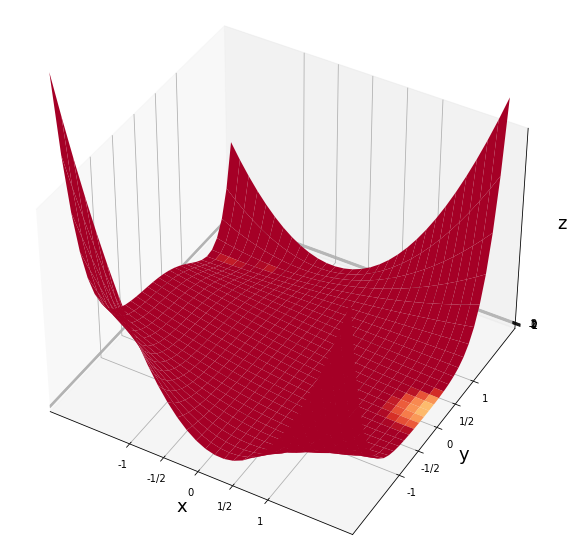

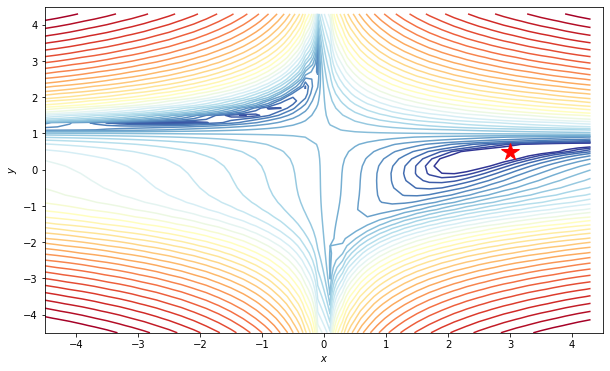

In [2]:
#Plot 3D Beale function
x, y = np.mgrid[-2:2:31j, -2:2:31j] 
fig,ax=plot_surface(x,y,beales_function(np.array([x,y]),features=0,target=0),xlimL=2.1, xlimH=2.1, ylimL=2.1, ylimH=2.1, zlimL=0,zlimH=300)

#Beale function contour plot
fig1,ax1 =contour_beales_function()
plt.show()

##PER ANIMARE IL PLOT
https://towardsdatascience.com/gradient-descent-animation-1-simple-linear-regression-e49315b24672

#Approaching Gradient Descent

##Test different updating functions

In [3]:
# Initialize theta0
#inizializzazioni da dove convergiamo meglio
#[-1,-1],[3,-3],[3,3],[-1,-4]


theta0 = np.array([2,2])

# Run Gradient Ascent method
n_iter=1000
theta_final_vanilla, log_l_history_vanilla,descent_trajectory_vanilla = gradient_descent(theta0,features=theta0,target=theta0,lr=0.0001,
                                                        num_steps=n_iter,loss=beales_function,
                                                        GD_type=vanilla_descent,gradient_function=beales_gradient,
                                                        beta=0.01,n_iter=n_iter,t=0, theta_p=0)

theta_final_NAG, log_l_history_NAG,descent_trajectory_NAG = gradient_descent(theta0,features=theta0,target=theta0,lr=0.0001,
                                                   num_steps=n_iter,loss=beales_function,
                                                   GD_type=NAG,gradient_function=beales_gradient,
                                                   beta=0.01,n_iter=n_iter,t=0, theta_p=0)

theta_final_RK4, log_l_history_RK4,descent_trajectory_RK4 = gradient_descent(theta0,features=theta0,target=theta0,lr=0.0001,
                                                   num_steps=n_iter,loss=beales_function,
                                                   GD_type=RK4,gradient_function=beales_gradient,
                                                   beta=0.01,n_iter=n_iter,t=0, theta_p=0)

theta_final_RK2, log_l_history_RK2,descent_trajectory_RK2 = gradient_descent(theta0,features=theta0,target=theta0,lr=0.0001,
                                                   num_steps=n_iter,loss=beales_function,
                                                   GD_type=RK_2_adaptive_gradient,gradient_function=beales_gradient,
                                                   beta=0.01, n_iter=n_iter,t=0, theta_p=0)

print(theta_final_RK2, theta_final_RK4, theta_final_NAG, theta_final_vanilla)


[2.99999899 0.49999976] [2.76327629 0.43441536] [1.51188531 0.36651228] [2.06974609 0.27067801]


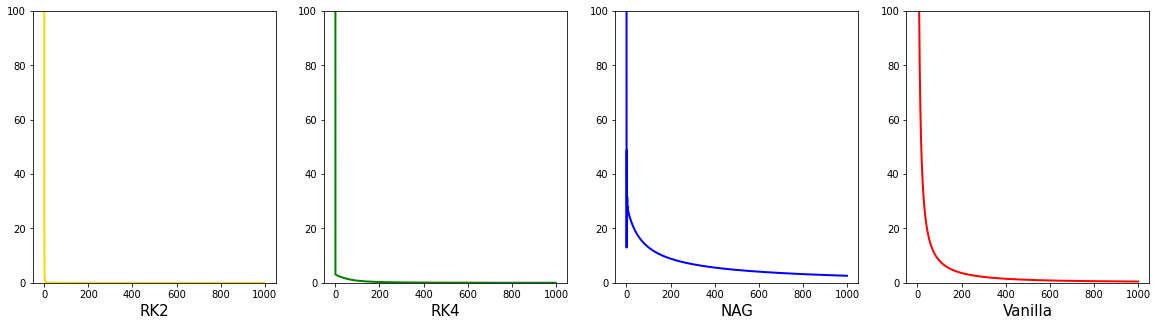

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
ax1.plot(log_l_history_RK2,color="gold",linewidth=2)
ax1.set_xlabel("RK2",fontsize=15)
ax1.set_ylim([0, 100])
ax2.plot(log_l_history_RK4,color="green",linewidth=2)
ax2.set_xlabel("RK4",fontsize=15)
ax2.set_ylim([0, 100])
ax3.plot(log_l_history_NAG,color="blue",linewidth=2)
ax3.set_xlabel("NAG",fontsize=15)
ax3.set_ylim([0, 100])
ax4.plot(log_l_history_vanilla,color="red",linewidth=2)
ax4.set_xlabel("Vanilla",fontsize=15)
ax4.set_ylim([0, 100])

plt.show()

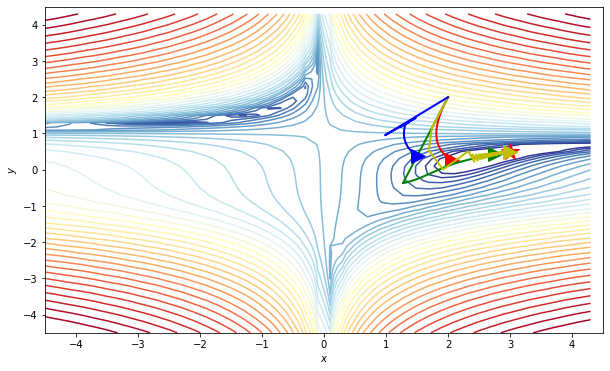

In [5]:
fig1, ax1=contour_beales_function()
overlay_trajectory(ax1,descent_trajectory_vanilla, 'Vanilla','r')
overlay_trajectory(ax1,descent_trajectory_RK4, 'RK','g')
overlay_trajectory(ax1,descent_trajectory_RK2, 'RK','y')
overlay_trajectory(ax1,descent_trajectory_NAG, 'NAG','b')

plt.show()



#Over the Titanic dataset

### Processing the test dataset

The values of `Sex` and `Embarked` (port of embarkation) are transformed into integeres with the following correspondence:
- Sex:
    - `male` -> `0`
    - `female` -> `1`
- Embarked:
    - `C` -> `-1`
    - `Q` -> `0`
    - `S` -> `1`

In [6]:
# Importing the data and dropping features uncorrelated with survival outcome
unprocessed_training_dataset = pd.read_csv("train.csv", index_col='PassengerId')
training_dataset = unprocessed_training_dataset.drop(columns=["Ticket", 'Cabin', 'Name'])

#Normalizing with the mean the Age and Fare values
training_dataset['Age'] = ((training_dataset['Age'] - training_dataset['Age'].mean()) / training_dataset['Age'].max())
training_dataset['Fare'] = ((training_dataset['Fare'] - training_dataset['Fare'].mean()) / training_dataset['Fare'].max())

# Droppig passangers with missing values
training_dataset = training_dataset.dropna(subset=["Embarked", "Age"])

# Discretizing the `Sex` and `Embarked` values
training_dataset['Sex'] = training_dataset['Sex'].replace(to_replace=["male", "female"], value=[0, 1])
training_dataset['Embarked'] = training_dataset['Embarked'].replace(to_replace=["C", "Q", "S"], value=[-1, 0, 1])

# Transforming the dataset in numpy arrays to implement the gradient ascent
training_data_matrix = training_dataset.drop(columns='Survived').to_numpy()
target_array = training_dataset['Survived'].to_numpy().reshape((-1, 1))

# adding a column on ones for to the data matrix corresponding to the coventional x0 feture
column_of_ones = np.ones(shape=(training_data_matrix.shape[0], 1))
training_data_matrix = np.hstack((column_of_ones, training_data_matrix))

# Visualizing the first elements of the training_dataset
training_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,-0.096239,1,0,-0.048707,1
2,1,1,1,0.103761,1,0,0.076277,-1
3,1,3,1,-0.046239,0,0,-0.047390,1
4,1,1,1,0.066261,1,0,0.040786,1
5,0,3,0,0.066261,0,0,-0.047146,1


### Computing the paramenters

The accuracy on the training set is  0.79


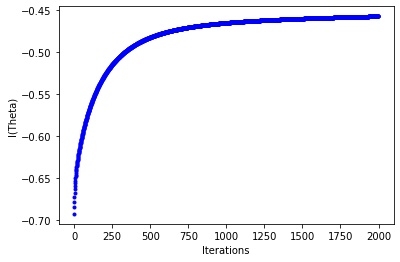

In [35]:
# Initialize theta0
theta0 = np.zeros((training_data_matrix.shape[1], 1)) # 1dimensional verical array of shape (8, 1) 

# Run Gradient Ascent method
n_iter=2000

theta_final,log_l_history,trajectory=gradient_descent(theta0,features=training_data_matrix,target=target_array,lr=-.05 ,
                                                        num_steps=n_iter,loss=log_likelihood,
                                                        GD_type=vanilla_descent,gradient_function=log_likelihood_gradient,
                                                        beta=0.01,n_iter=n_iter,t=0, theta_p=0)
# Plotting the log likelihood over iterations
fig,ax = plt.subplots(num=2)
ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')
Accuracy = (predictions(training_data_matrix, theta_final) == target_array).sum() / len(target_array)
print(f"The accuracy on the training set is {Accuracy: .2}")

### Processing the test set

In [22]:
# Importing the data and dropping features uncorrelated with survival outcome
unprocessed_test_dataset = pd.read_csv("test.csv", index_col='PassengerId')
test_dataset = unprocessed_test_dataset.drop(columns=["Ticket", 'Cabin', 'Name'])

#Normalizing with the mean the Age and Fare values
test_dataset['Age'] = ((test_dataset['Age'] - test_dataset['Age'].mean()) / test_dataset['Age'].max())
test_dataset['Fare'] = ((test_dataset['Fare'] - test_dataset['Fare'].mean()) / test_dataset['Fare'].max())

# Discretizing the `Sex` and `Embarked` values
test_dataset['Sex'] = test_dataset['Sex'].replace(to_replace=["male", "female"], value=[0, 1])
test_dataset['Embarked'] = test_dataset['Embarked'].replace(to_replace=["C", "Q", "S"], value=[-1, 0, 1])

# Transforming the dataset in numpy arrays to implement the gradient ascent
test_data_matrix = test_dataset.to_numpy()

# adding a column on ones for to the data matrix corresponding to the coventional x0 feture
column_of_ones = np.ones(shape=(test_data_matrix.shape[0], 1))
test_data_matrix = np.hstack((column_of_ones, test_data_matrix))

### Computing the predictions

In [36]:
# Computing the predictions and storing them into an array
survived_array = predictions(test_data_matrix, theta_final).flatten()

# Inserting the predictions into the Test Dataframe
Survived_series = pd.Series(data=survived_array, name='Survived', index=test_dataset.index)
Survived_series.to_csv("predictions.csv")
print(f"The accuracy computed by Kaggle is 0.77")

The accuracy computed by Kaggle is 0.77
